In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy.random as nrm
import math

Implement the K−means algorithm. Your program must accept as input an d × N data matrix X, the number of
clusters K, and the stopping threshold e. Your program must output the following:
(a) the error at the end of each iteration,
(b) the K centroids at convergence,
(c) the K clusters at convergence.

In [3]:
def reshape(img):
    x = img.shape[0]
    y = img.shape[1]
    flat = np.reshape(img,newshape=(x*y,3))
    return flat

In [7]:
#k = int(input("No of clusters:"))
k = 4
im = plt.imread("/home/varshi/Downloads/4.2.07.tiff")
img = reshape(im)
img_shape = img.shape
n = img.shape[0]
d = img.shape[1]
print(n)

262144


In [11]:
def centroids(X,k):
    idx = np.random.randint(X.shape[0], size = k)
    centroids = X[idx,:]
    return centroids

In [12]:
def cluster_id(centroids,X,K):
    ids = []
    for x in X:
        cid = []
        for y in centroids:
            np.array(cid.append(LA.norm(x-y)))
        ids.append(np.argmin(cid))
    return np.array(ids)

In [13]:
def newc(K,cluster_id,x):
    new_cent = []
    for i in range(K):
        c_i = x[cluster_id==i] 
        c_i = np.mean(c_i,axis=0)
        new_cent.append(c_i)
    return np.array(new_cent)

In [14]:
cx = centroids(img,k)  #Check
print(cx)

[[180 217 148]
 [185  49  49]
 [166  99  34]
 [ 77 129  47]]


In [15]:
r = cluster_id(cx,img,k)
print(r)

[0 3 3 ... 3 3 2]


In [16]:
n = len(np.unique(r))
if (k==n):
    print("Clusters Assigned Successfully")

Clusters Assigned Successfully


In [17]:
n = newc(k,r,img)  #Check
print(n)

[[146.25675002  47.25323429  39.64295469]
 [146.38809024  96.54755059  58.50967599]
 [182.30563856 176.81031661  93.15448239]
 [132.48253385 169.73192983  86.19727437]]


In [18]:
err = LA.norm(n-cx)  #Check
print(err)

248.25249995184814


In [19]:
threshold = 1
print("\n")
itr =0 
error = 2 + threshold
cd = centroids(img,k)
while (error > threshold):
    ids = cluster_id(cd,img,k)
    new = newc(k,ids,img)
    error = LA.norm(new-cd)
    print("Error at Iteration %d : %f"%(itr,error))
    cd = new
    itr += 1
    
if(error<threshold):
    print("\n")
    print("***********VALUES CONVERGED***********\n")
print("Total Iterations :", itr)
print("K Centroids at Convergence :\n",new)



Error at Iteration 0 : 185.816944
Error at Iteration 1 : 33.747053
Error at Iteration 2 : 10.147186
Error at Iteration 3 : 5.602485
Error at Iteration 4 : 3.571266
Error at Iteration 5 : 2.256904
Error at Iteration 6 : 1.413676
Error at Iteration 7 : 0.891330


***********VALUES CONVERGED***********

Total Iterations : 8
K Centroids at Convergence :
 [[185.13208911  49.05598993  40.90237241]
 [125.25414372 154.40737301  73.17622742]
 [178.94097158 200.84092751 117.20748091]
 [ 80.78769178  17.2460415   13.48303501]]


Text(0.5, 1.0, 'Clustered')

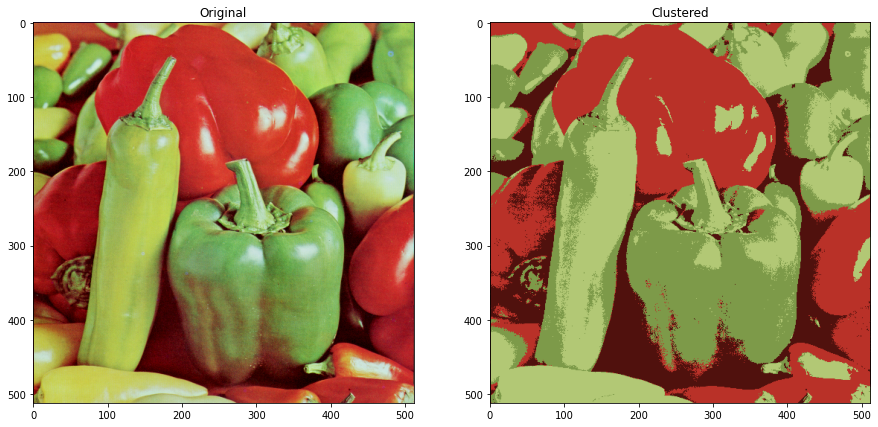

In [20]:
cid = cluster_id(cd,img,k)
img_km= np.uint(cd[cid])
img_km= img_km.reshape(im.shape)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(img_km)   
ax2.set_title('Clustered')